# Script for generating slope curves from non-adiabatic AC Calorimetry data

Please reach out if you have idéas for improvements for the code, or if you experience many problems running the code. Contact information: lisegr@dtu.dk

To understand the physics and the need for slope curves read this article: [Link to article DOI TODO](TODO!!!) and [Link to article DOI TODO](TODO!!!)

**Before you begin without programming experience:**

If this is your first time programming, here are a few things that will be helpful to know. 
1. Cells: The Python code is split into cells, which are run individually. To run a single cell, click somewhere in the cell and press the triangle icon in Jupyter Notebook (or Google Colab). Alternatively, you can run the current cell by pressing `shift` + `enter` on your keyboard.
2. Comments: If you insert #, the rest of the line will function as a comment. This means that the program will not read anything after # in that line. These are used to write notes and explanations in the code and to temporarily ignore parts of the code when it is not needed.
3. Variables: Values can be saved as variables when the program runs. E.g., running the line `a=2` means that after this line has been run the variable `a` is saved as equal to 2. If we hereafter run the line `a+a`, the program would calculate this to 4. 
4. Stings: Text can be saved as strings by placing the text inside citations, e.g., `'sting text'` or `'a+a'`. The latter is just a text, and thus even if we used `a=2` previously, the program would just print a+a and not 4. 
5. `print()`: This command is used to make the program print whatever is given as an argument inside the parentheses.

You can check your understanding by playing with the code below - it will only take 2 minutes. 

In [43]:
a = 2


print(a+a)
print('a+a')
#print('a+a = ' , a+a)  # Try to remove the '#' sign at the beginning of this line and run the cell again. 

4
a+a


## Loading Python packages
This cell must be run before the rest of the program can work. Apart from that, this cell can be ignored for inexperienced Python users. 

In [31]:
import pandas as pd   #Package for opening and reading data files
from matplotlib import pyplot as plt #Package for generating plots
import numpy as np #Package for handling arrays
from scipy.signal import savgol_filter #Savitzky Golay filter package
%matplotlib widget

## Loading data from desktop

If you are new to Python, this step of reading the data correctly will most likely be the most challenging. Do not be worried, hereafter, everything will become much simpler after this step. This step is the most complicated, as I can not predict which structure your data file will have. 

**How to proceed such that the program reads your own data file:**
1. The first step is to place the data file you want to analyse in the folder "Data". Keep the original data files in the folder as they are good for understanding how the original code worked.
2. Keep the original name you gave your own data file and change the name in the line `file1 = 'Datafile 1.txt'`. Remember to write the file extention (.txt , .csv). If your data is saved in an Excel file you can eiter open it in Excel and save a copy of the data in either .csv or .txt format. Alternatively, you can try to change the code below and use the command `pd.read_excel()` instead. 
5. Change the `lable1` to a sensible name.
6. Now, the complicated step of ensuring that Python can read the data. Reading the data is done by the package pandas with the command `pd.read_csv()` (pd is the short name for pandas). Here, I will explain the arguments used in the code below, which will most likely also be necessary for you.
   1. First argument *filepath*: Here, you tell the program where to find your data file. In the original code, the program was told to use the path `Data/Datafile1.txt`. An f-string was used to obtain this file name from `f'Data/{file1}'`. Thus if you have changed `file1 = ...` into the name of your own file, the file path will be correct.
   2. Second argument *separator*: Here, you tell the program how columns are separated in your data file. Typical separators are tabs ('\t') and commas (','). If you are in doubt, you can also try to use `sep = csv.Sniffer` and the program will try to guess the separator automatically. You determine the separator by opening your .csv or .txt file in a text program (e.g. Notepad++, Notepad, or similar).
   3. Third argument *header*: Here, you tell the program in which line number the column names are given. For example, if you open one of the original data files (Datafile1 or Datafile2) you will see that the third line gives the names of the Columns:
      
       'Time [s] &emsp; Current [A] &emsp; Voltage [V] &emsp; T0 [degC] &emsp; State'
      
      By setting `header=2`, the program will use the third line to name each of the columns. Why `header=2` and not `header=3`? Because Python is zero-index, meaning it always starts counting 0,1,2,3...
      
      To get the correct line number for the header, open your data file with a text program and count the line number of the header.

      If your data file does not have column names, or the column names are long and inconvenient, you can also change the column names by adding another 4th argument `pd.read_csv(.... , names=['t', 'T1', 'T2', 'Current'])`


If you are experiencing problems with `pd.read_csv()`, an overview of all the arguments which can be used by `pd.read_csv()` and explanations of these arguments can be found here: [Documentation on pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

**Confirm `pd.read_csv()` has read your data file correct:**

Using the `print(df1)` command, the program prints the table of the data in df1. OBS: The very first column is just the line numbers 0, 1, 2, 3,... The rest of the table should look similar to your data file when opened in a text program. 

Try to out-comment the line `print(df1)` (change it into `#print(df1)`) and see what happens when you run the cell again. Out-commenting lines that you only need sometimes is often very handy. For example, now, after you have checked that the variable `df1` is printed nicely and correctly as a sensible table. Thus, until you decide to read a new datafile, you might as well outcomment `print(df1)` since you are not interested in seeing the table for now. 

In [32]:

#First data file
file1 = 'Datafile 1.txt'
label1 = 'Sample 1' # Label1 is the name you want to use in the legends of the plots for this datafile
df1 = pd.read_csv(f'Data/{file1}', sep='\t', header=2) #Open the first data file. df1 = short name for data file 1

print(df1)

# Second data file
file2 = 'Datafile 2.txt'
label2 = 'Sample 2'
df2 = pd.read_csv(f'Data/{file2}', sep='\t', header=2) #Open the second data file.

#print(df2)


         Time [s]  Current [A]  Voltage [V]  T0 [degC]   State
0        0.000028        0.000          0.0  19.427979  BEFORE
1        0.502325        0.000          0.0  19.429718  BEFORE
2        0.999953        0.000          0.0  19.431976  BEFORE
3        1.505110        0.000          0.0  19.429260  BEFORE
4        1.999976        0.000          0.0  19.428619  BEFORE
...           ...          ...          ...        ...     ...
4793  2397.499999        0.001          0.0  22.332367    WAIT
4794  2397.999994        0.001          0.0  22.330444    WAIT
4795  2398.499989        0.000          0.0  22.329315    WAIT
4796  2399.000901        0.000          0.0  22.327240    WAIT
4797  2399.499970        0.000          0.0  22.325470    WAIT

[4798 rows x 5 columns]


## How to read a single data column

After having read the data files and saved them into a variable called `df1` and `df2` in the previous cell, we are now ready to pick out single columns of data. For example, we can use `df['Time [s]']` to read the column with the name 'Time [s]' in the original data files (Datafile1.txt and Datafile2.txt). Most likely, the names are different in your own data file (or you might have chosen different names by the `names=[t,T1,...]` variable option) in the `pd.read_csv()` command. Thus, adjust the name such that you call for the correct column names e.g., `df1['t']` in the cell below. 

To keep the overview simple, out-comment all lines except one, such that you do not print too many things at the same time. 

The command `df1['Time [s]'].iloc[-1]` only prints one number. This is because appending with `.iloc[-1]` ask only to get the very last value in the column. Try to change this to `.iloc[0]` and you should get the very first number in the column. 

In [33]:
print( df1['Time [s]'] )
#print( df1['T0 [degC]'])
#print(df1['Time [s]'].iloc[-1])

#print(df2['Time [s]'])

0          0.000028
1          0.502325
2          0.999953
3          1.505110
4          1.999976
           ...     
4793    2397.499999
4794    2397.999994
4795    2398.499989
4796    2399.000901
4797    2399.499970
Name: Time [s], Length: 4798, dtype: float64


## Save columns into variables
This is a bit of a dummy step. The point is to save you from changing the names of variables in the rest of the code too much, and instead, I will force you to save the data in variable names that I have chosen for you.

**Do this:**
1. In the code below, change the script such that `time1` is equal to the time column of your data file. This could e.g be `df1['t']`. 
2. Then change `temp1` to the temperature column of your data file, e.g. `df1['T']`

In [34]:
time1 = df1['Time [s]']
temp1 = df1['T0 [degC]']

time2 = df2['Time [s]']
temp2 = df2['T0 [degC]']

## Plot of the raw measurement data

**Contratulations** You are through the part of reading the data! Now the rest of the code should hopefully run smoothly and be easier to work with. And even more exciting, we are ready to start plotting the data. 

**Raw data:**

As a first check, we plot the raw data to confirm that it looks as expected. This is done by the two lines under `#Plot of the raw data`


**Interpolation of the data**:

The Savitzky-Golay filter, which will be used to calculate the time derivatives $dT_s/dt$ later in the script, requires the data to be sampled with a constant sampling time. The code below ensures that the data points are evenly distributed in time by interpolating the data into two arrays (`time1_SG` and `temp1_SG`). The subscript SG refers to Savitzky-Golay, as these new interpolated data points are to be used in the Savitzky-Golay filter. If your measurements were measured with a constant sampling time, the interpolation will not change the data. 


If you want to change the colors in the plot at some point, a list of the color names can be found here: [link to plt colors](https://matplotlib.org/3.4.2/gallery/color/named_colors.html)



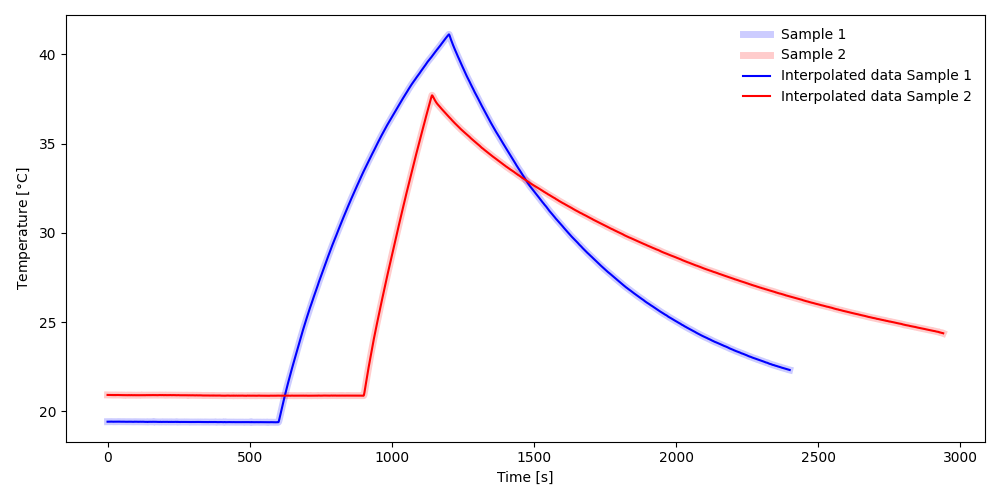

In [35]:
fig, ax  = plt.subplots(1,1,figsize=(10,5)) #Create a plot window with 1 graph. Adjust the size of the figure by figsize=(width,height)


#Plot of the raw data
ax.plot(time1,temp1,label = label1, linewidth=5, color='blue' , alpha = 0.2) #plot DeltaT vs time. alpha = transparency.
ax.plot(time2,temp2,label = label2, linewidth=5, color='red' , alpha = 0.2 ) #plot DeltaT vs time




#Interpolation of data
time1_SG = np.linspace(time1.iloc[0] , time1.iloc[-1] , len(time1))
temp1_SG = np.interp(time1_SG , time1 , temp1)
ax.plot(time1_SG , temp1_SG , color='blue', label = 'Interpolated data Sample 1')

dt2 = np.mean(np.diff(time2))  #Average sampling time
time2_SG = np.linspace(time2.iloc[0] , time2.iloc[-1] , len(time2))
temp2_SG = np.interp(time2_SG , time2 , temp2)
ax.plot(time2_SG , temp2_SG , color='red', label = 'Interpolated data Sample 2')


ax.legend(frameon=False) #Print the legend inside the figures

ax.set_xlabel('Time [s]')
ax.set_ylabel(r'Temperature [$\degree$C]')

plt.tight_layout()

## Sample specification
To get the y-axis of the slope curve in units of Watts, type the heat capacity of the sample. 

In [36]:
c = 4184  #Specific heat capacity of water, J/(K kg)
rho = 1000 # mass density, kg/m^3
V = 1e-3*1e-3 # Sample volume in L 

C = rho*c*V #Heat capacity of the sample, J/K

c_MNP = 3 #kg/m3 #Concentration of magnetic nanoparticles in the sample. 



## Settings Savitzky-Golay filter
1. Choose the polynomial order (first-order polynomial is recommended, i.e., `polyorder=1`)
2. Choose the width of the window in which the polynomials are fitted. The widow width must be given as the number of data points inside the window. It is recommended to play a bit with the value of the window to see how this affects the data (High noise level of the values of $dT_s/dt$ and over-smoothing when the window is narrow and wide, respectively).

**Short explanation of the Savitzky-Golay filter:**

The Savitzky-Golay filter is usually used for smoothing data. However, it can also be used for obtaining the derivatives of a data set, such as $dT_s/dt$, which is the feature we are interested in. The Savitzky-Golay filter corresponds to fitting polynomials along the entire dataset within a window moving across the dataset. The [Savitzky-Golay filter Wikipedia page](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter) has a good animation of how the filter can be visualised as a window moving across the data while fitting a polynomial in each window. From each of these polynomial fits, the value of the first-order derivative can be extracted. For our case, these first-order derivatives are used to calculate $dT_s/dt$. 

The sampling time must be constant throughout the measurement, as this allows the moving polynomial fit to become reduced into a convolution with predefined coefficients. This is ensured by the use of `np.interp(  )` in the previous part of the code. 


In [37]:
polyorder   = 1  # Polynomial order
Window     = 6 # Window size (number of Datapoints) 


dt1 = np.mean(np.diff(time1_SG))  #Average sampling time Sample 1
print('Sample 1 Savitzky-Golat filter window width in time:' , Window*dt1 ,'s') # Confirm that your time unit is also s in your data file.

dt2 = np.mean(np.diff(time2_SG))  #Average sampling time Sample 2
print('Sample 2 Savitzky-Golat filter window width in time:' , Window*dt2 ,'s')



Sample 1 Savitzky-Golat filter window width in time: 3.0012507091932457 s
Sample 2 Savitzky-Golat filter window width in time: 3.001020909647779 s


## Plot Slope curves

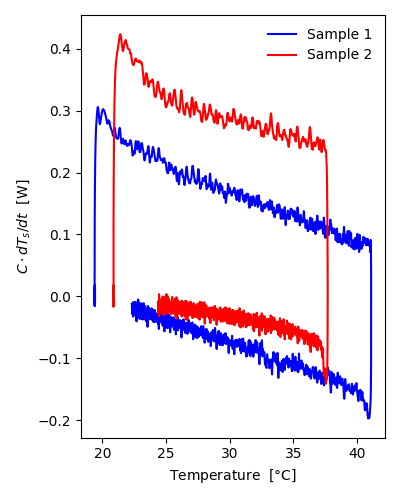

In [38]:
fig,ax = plt.subplots(figsize=(4,5))

CdTdt1 = C*savgol_filter(temp1_SG, Window, polyorder,1,dt1) #Calculate the C*dT/dt
ax.plot(temp1_SG , CdTdt1 , color='blue' , label = label1)

CdTdt2 = C*savgol_filter(temp2_SG, Window, polyorder,1,dt2) #Calculate the C*dT/dt
ax.plot(temp2_SG , CdTdt2 , color='red' , label = label2)

ax.legend(frameon=False)
ax.set_xlabel(r'Temperature  [$\degree$C]')
ax.set_ylabel(r'$C \cdot dT_s/dt$  [W]')

plt.tight_layout()


# Determination of heating powers by the Corrected Slope Method
**Before continuing, confirm that the heat losses seem linear based on the slope curves**

From here on, we will only look at one data set at a time (`df1`) to avoid overcomplicated plots. 

The first step in determining heating power is to determine the linear loss coefficient $L$. This is done by a linear fit to the heating and cooling phase of the slope curve. Notice that the data sets uploaded are not sufficiently linear to give a good estimate of the heating power. This need for more linearity is more clearly visualised when linear lines are fitted to determine $L$. 

As seen from the equation below, $L$ corresponds to the linear slope in a linear fit in the slope curve. In the heating phase $L$ is found by

$$
C\cdot dT_s/dt  = P_\text{MNP} - L\Delta T
$$

And in the cooling phase: 

$$
C\cdot dT_s/dt  = - L\Delta T
$$


**You must change the code such that**
1. the `start_time_heating` and `end_time_heating` match the time when the field turns on and off.
2. the `start_time_cooling` and `end_time_cooling` match the time when the field is turned off (the cooling strats) and when the measurement ends.

In the plots, confirm that the regions you have selected are correct. 


L coefficient heating: 0.008842065383740508 W/degC
L coefficient cooling: 0.007359280990840656 W/degC


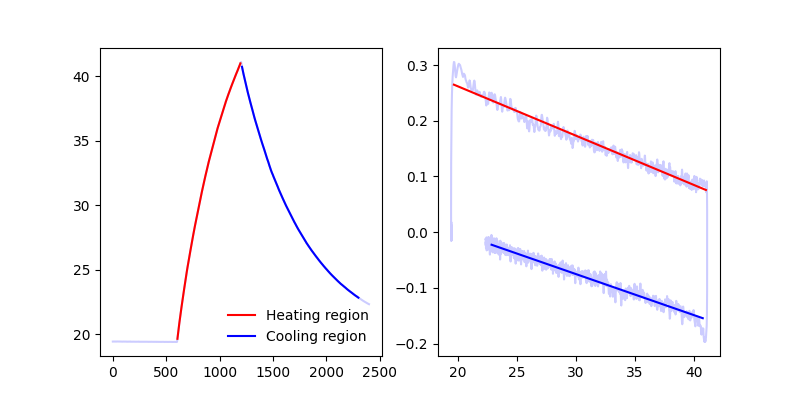

In [44]:
start_time_heating = 605 #s
end_time_heating = 1195 #s

start_time_cooling = 1210 #s
end_time_cooling = 2300 #s



index_heating = (time1_SG>start_time_heating) & (time1_SG<end_time_heating)
index_cooling = (time1_SG>start_time_cooling) & (time1_SG<end_time_cooling)

fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(time1_SG, temp1_SG, color='blue' , alpha = 0.2 )
ax[0].plot(time1_SG[index_heating], temp1_SG[index_heating] , color = 'red' , label = 'Heating region')
ax[0].plot(time1_SG[index_cooling], temp1_SG[index_cooling] , color = 'blue' , label = 'Cooling region')

ax[0].legend(frameon=False)

ax[1].plot(temp1_SG , CdTdt1 , color='blue',alpha=0.2 , label = label1)

p_h = np.polyfit(temp1_SG[index_heating] , CdTdt1[index_heating], 1)
ax[1].plot(temp1_SG[index_heating] , np.polyval(p_h,temp1_SG[index_heating]) , color='red' , label = label1)


p_c = np.polyfit(temp1_SG[index_cooling] , CdTdt1[index_cooling], 1)
ax[1].plot(temp1_SG[index_cooling] , np.polyval(p_c,temp1_SG[index_cooling]) , color='blue' , label = label1)

print('L coefficient heating:', -p_h[0] , 'W/degC')
print('L coefficient cooling:', -p_c[0] , 'W/degC')


## Heating power estimation

To calculate the heating power, we use the values of $L$ found from the previous plot and calculate

$$
P_\text{MNP} = C\cdot dT_s/dt + L\Delta T
$$

Mean heating power using L from the heating phase:  0.2669628227834582 W   (red dashed line)
Mean heating power using L from the heating phase:  0.24761289860215163 W   (blue dashed line)


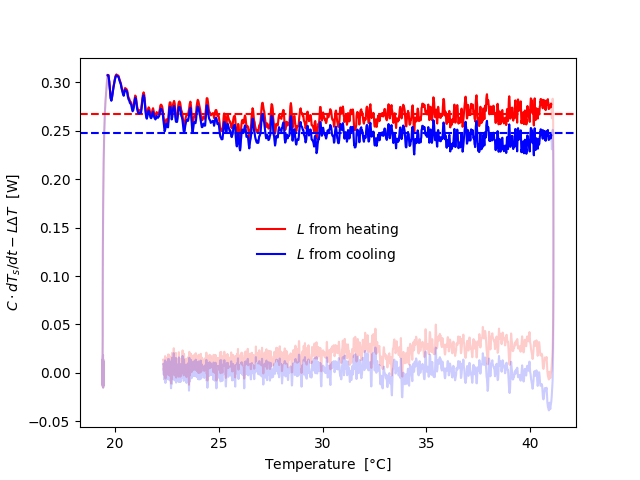

In [46]:
fig,ax = plt.subplots()

DeltaT = temp1_SG - np.min(temp1_SG)
ax.plot(temp1_SG , CdTdt1 - DeltaT*p_h[0], color='red', alpha=0.2)
ax.plot(temp1_SG[index_heating] , CdTdt1[index_heating] - DeltaT[index_heating]*p_h[0], color='red' , label = r'$L$ from heating')
ax.axhline(np.mean(CdTdt1[index_heating] - DeltaT[index_heating]*p_h[0]), color='red', linestyle = '--')

ax.plot(temp1_SG , CdTdt1 - DeltaT*p_c[0], color='blue', alpha=0.2)
ax.plot(temp1_SG[index_heating] , CdTdt1[index_heating] - DeltaT[index_heating]*p_c[0], color='blue', label = r'$L$ from cooling')
ax.axhline(np.mean(CdTdt1[index_heating] - DeltaT[index_heating]*p_c[0]), color='blue', linestyle = '--')

ax.legend(frameon=False)
ax.set_xlabel(r'Temperature  [$\degree$C]')
ax.set_ylabel(r'$C\cdot dT_s/dt - L\Delta T$  [W]')


print('Mean heating power using L from the heating phase: ', np.mean(CdTdt1[index_heating] - DeltaT[index_heating]*p_h[0]) , 'W   (red dashed line)')
print('Mean heating power using L from the heating phase: ', np.mean(CdTdt1[index_heating] - DeltaT[index_heating]*p_c[0]) , 'W   (blue dashed line)')